In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
tests = 7
N = 40000

# Columnwise 

In [3]:
columnwise = pd.read_csv('./columnwise.csv', index_col=0)
columnwise.head()

,$index_{max}$,$max$,index_{min},min,avg
0,1.0,3.887,1.0,3.887,3.887
1,1.0,3.887,2.0,1.710,2.798
2,1.0,3.887,3.0,1.701,2.433
3,1.0,3.887,3.0,1.701,2.251
4,1.0,3.887,3.0,1.701,2.143


In [4]:
end_columnwise = columnwise.iloc[columnwise.index[(columnwise.index % tests == 0)] - 1].sort_index()
end_columnwise.index = pd.np.arange(len(end_columnwise)) + 1

In [5]:
end_columnwise['total_avg'] = end_columnwise['avg'].mean()

In [6]:
end_columnwise.head()

,$index_{max}$,$max$,index_{min},min,avg,total_avg
1,1.0,3.887,6.0,1.694,2.016,1.9376
2,1.0,3.675,6.0,1.605,1.910,1.9376
3,1.0,3.718,7.0,1.587,1.898,1.9376
4,1.0,3.772,4.0,1.616,1.941,1.9376
5,1.0,3.728,4.0,1.613,1.923,1.9376


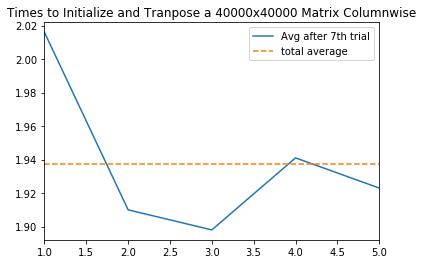

In [7]:
ax = end_columnwise['avg'].plot(legend=True, title='Times to Initialize and Tranpose a 40000x40000 Matrix Columnwise')
ax = end_columnwise['total_avg'].plot(legend=True, style=['--'])
plt.legend(['Avg after 7th trial', 'total average'])

In [8]:
end_columnwise['avg'].mean()

1.9375999999999998

# Rowwise 

In [9]:
rowwise = pd.read_csv('./rowwise.csv', index_col=0)
rowwise.head()

,$index_{max}$,$max$,index_{min},min,avg
0,1.0,3.883,1.0,3.883,3.883
1,1.0,3.883,2.0,1.773,2.828
2,1.0,3.883,3.0,1.771,2.475
3,1.0,3.883,3.0,1.771,2.301
4,1.0,3.883,3.0,1.771,2.196


In [10]:
end_rowwise = rowwise.iloc[rowwise.index[(rowwise.index % tests == 0)] - 1].sort_index()
end_rowwise.index = pd.np.arange(len(end_rowwise)) + 1

In [11]:
end_rowwise['total_avg'] = end_rowwise['avg'].mean()

In [12]:
end_rowwise.head()

,$index_{max}$,$max$,index_{min},min,avg,total_avg
1,1.0,3.883,7.0,1.771,2.075,2.154
2,1.0,3.680,3.0,1.910,2.176,2.154
3,1.0,3.620,7.0,1.878,2.143,2.154
4,1.0,3.588,6.0,1.909,2.173,2.154
5,1.0,3.611,4.0,1.947,2.203,2.154


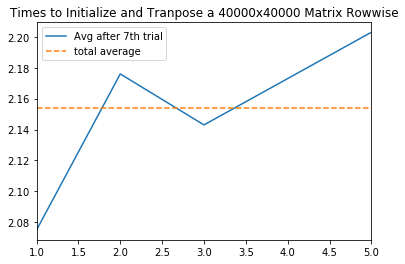

In [13]:
ax = end_rowwise['avg'].plot(legend=True, title='Times to Initialize and Tranpose a 40000x40000 Matrix Rowwise')
ax = end_rowwise['total_avg'].plot(legend=True, style=['--'])
plt.legend(['Avg after 7th trial', 'total average'])

In [14]:
end_rowwise['avg'].mean()

2.1539999999999999

# Comparisons

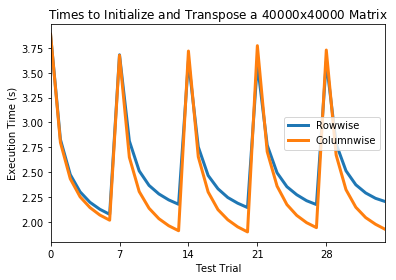

In [15]:
title = 'Times to Initialize and Transpose a ${N}$x${N}$ Matrix'
rowwise['avg'].plot(title=title.format(N=N), legend=True, lw=3)
ax = columnwise['avg'].plot(legend=True, lw=3)
ax.legend(['Rowwise', 'Columnwise'])
ax.set_xlabel('Test Trial')
ax.set_ylabel('Execution Time (s)')
_ = ax.set_xticks(7 * (pd.np.arange(len(end_rowwise))))

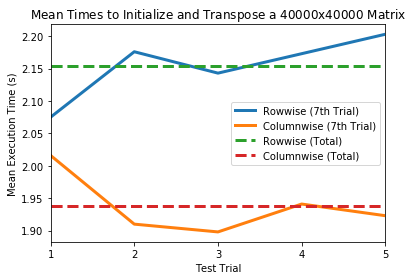

In [16]:
title = 'Mean Times to Initialize and Transpose a ${N}$x${N}$ Matrix'
end_rowwise['avg'].plot(title=title.format(N=N), legend=True, lw=3)
ax = end_columnwise['avg'].plot(legend=True, lw=3)

ax.set_xlabel('Test Trial')
ax.set_ylabel('Mean Execution Time (s)')

ax = end_rowwise['total_avg'].plot(legend=True, style=['--'], lw=3)
ax = end_columnwise['total_avg'].plot(legend=True, style=['--'], lw=3)
ax.legend(['Rowwise (7th Trial)', 'Columnwise (7th Trial)', 'Rowwise (Total)', 'Columnwise (Total)'])
s
_ = ax.set_xticks(pd.np.arange(len(end_rowwise)) + 1)